In [47]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [49]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import numpy as np
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from pdf2image import convert_from_path

In [52]:
reader=easyocr.Reader(['en'])
reader

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


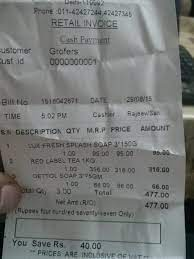

In [238]:
img=cv2.imread('/content/download (4).jpg')
#Img_resize=cv2.resize(img,(700,400))
# Using cv2.rotate() method
# Using cv2.ROTATE_90_CLOCKWISE rotate
# by 90 degrees clockwise
#img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img)

In [239]:
output=reader.readtext(img)
#output

output1 = reader.readtext(img, allowlist ='0123456789')
#output1

dt=[]
for i in range(len(output)):
  result=output[i][-2]
  dt.append(result)
  print(result)

Tn_7
Aeent
RELALUKII
Lalt"
erctM
#o 
UsteC
Oooo o03
Di-
Hnenerhe
Fms=
aorok
de"ca?TC
Cqut
Mc' Jic 02
Tnud
Wu_ted #vee
Jen Oua
SuveRa
40,00e
#0


In [240]:
#print(dt)
boss=" ".join(str(x) for x in dt)
print(boss)

Tn_7 Aeent RELALUKII Lalt" erctM #o  UsteC Oooo o03 Di- Hnenerhe Fms= aorok de"ca?TC Cqut Mc' Jic 02 Tnud Wu_ted #vee Jen Oua SuveRa 40,00e #0


In [241]:
for i in range(len(output1)):
  result1=output1[i][-2]
  print(result1) 

7
4
62442

3
00
5
0000305
22
426
435
932
04525
42
3131002
76
4
82
81
4000
0


In [242]:
df1=pd.DataFrame(output)
Extract_text=pd.DataFrame(df1[1])
Extract_text.columns=['Text']
Extract_text.head(50)

,Text
0,Tn_7
1,Aeent
2,RELALUKII
3,"Lalt"""
4,erctM
5,#o
6,UsteC
7,Oooo o03
8,Di-
9,Hnenerhe


In [243]:
'''import pandas as pd
 
# intialise data of lists.
data = {'Text':['29GGGGG1314R9Z6','L21091KA2019OPC141331','Total Amount','5000','Total Discount','545','Net Amount','202','Biller : 5d5f7','ALWPG5809L', 'Bill No : 984651', 'Date : 09 sep 2022','Place of Supply : Mumbai']}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
Extract_text=df
print(Extract_text)'''

"import pandas as pd\n \n# intialise data of lists.\ndata = {'Text':['29GGGGG1314R9Z6','L21091KA2019OPC141331','Total Amount','5000','Total Discount','545','Net Amount','202','Biller : 5d5f7','ALWPG5809L', 'Bill No : 984651', 'Date : 09 sep 2022','Place of Supply : Mumbai']}\n \n# Create DataFrame\ndf = pd.DataFrame(data)\n \n# Print the output.\nExtract_text=df\nprint(Extract_text)"

In [244]:
ser = pd.Series(Extract_text["Text"])
ser

0            Tn_7
1           Aeent
2       RELALUKII
3           Lalt"
4           erctM
5             #o 
6           UsteC
7        Oooo o03
8             Di-
9        Hnenerhe
10           Fms=
11          aorok
12       de"ca?TC
13           Cqut
14     Mc' Jic 02
15           Tnud
16    Wu_ted #vee
17        Jen Oua
18         SuveRa
19         40,00e
20             #0
Name: Text, dtype: object

# GSTIN

In [245]:
#GSTIN Number
A=[]
for i in Extract_text['Text']:
     if len(i)>=15:
       if i[-2]=='Z':
         A.append(i)

In [246]:
print(A)

[]


# CIN

In [247]:
#CIN Number
B=[]
for i in Extract_text['Text']:
     if len(i)==21:
       if i[0]=='U' or i[0]=='L':
         B.append(i)

In [248]:
print(B)

[]


# PAN

In [249]:
import re
#PAN 
#pan_regex ='[A-Z]{5}[0-9]{4}[A-Z]{1}'
t=[]
for a in Extract_text.index:
  found = re.search('[A-Z]{5}[0-9]{4}[A-Z]{1}', Extract_text['Text'][a])
  if found:
    fo=found.group(0)
    t.append(fo)

In [250]:
print(type(t))

<class 'list'>


In [251]:
print(t)

[]


# Bill No

In [252]:

bi=[]
for i in Extract_text['Text']:
  if i.startswith("Bill No"):
    #i.replace("Bill No","")
    bi.append(i)

In [253]:
print(bi)

[]


# Date

In [254]:
d_l=[]
for d in Extract_text['Text']:
  if d.startswith("Date:"):
    d_l.append(d)

In [255]:



print(d_l)

[]



# place of supply

In [256]:
pl=[]
for p1 in Extract_text['Text']:
  if p1.startswith("Place of Supply"):
    pl.append(p1)

In [257]:
print(pl)

[]


# Biller

In [258]:
bb=[]

for b in Extract_text['Text']:
  if len(b)<=6:
    if b.startswith("Biller"):
      pp=ser[ser==b].index[0]
      index=pp+1
      ppo=ser[index]
      fn_data=b+'-'+str(ppo)
      bb.append(fn_data)
  
  elif len(b)>=6:
    if b.startswith("Biller"):
      bb.append(b)


In [259]:
print(bb)

[]


# Amount

In [260]:
element=[]
for tt in ser:
  if tt=='Total Amount':
    x = ser[ser == 'Total Amount'].index[0]
    index=x+1
    amount=ser[index]
    final_data=amount
    element.append(final_data)

In [261]:
element_2=[]
for tt in ser:
  if tt=='Total Discount':
    x = ser[ser == 'Total Discount'].index[0]
    index=x+1
    amount=ser[index]
    final_data=amount
    element_2.append(final_data)

In [262]:
element_3=[]
for tt in ser:
  if tt=='Net Amount':
    x = ser[ser == 'Net Amount'].index[0]
    index=x+1
    amount=ser[index]
    final_data=amount
    element_3.append(final_data)

In [263]:
print(element)
print(element_2)
print(element_3)

[]
[]
[]


# Customer Name

In [264]:
cn=[]
for n in Extract_text['Text']:
  if n.startswith("Nane"):
    cn.append(n)

In [265]:
print(cn)

[]


# Address

In [266]:
add=[]
fg=[]
for ad in Extract_text['Text']:
  if ad.startswith("Address"):
    add.append(ad)
    y = ser[ser == add[0]].index[0]
    ads=y+1
    ap=ser[ads]
    add.append(ap)
    ja=str(add)
    jj=ja.replace(","," ").replace("[","").replace("]","").replace("'",'')
    print(jj)
    fg.append(jj)

In [267]:
print(fg)

[]


In [268]:
A1=pd.DataFrame(A,columns=['GSTIN NO.'])
B1=pd.DataFrame(B,columns=['CIN NO.'])
C1=pd.DataFrame(t,columns=['PAN'])
D1=pd.DataFrame(bi,columns=['BILL NO.'])
E1=pd.DataFrame(d_l,columns=['DATE'])
F1=pd.DataFrame(pl,columns=['PLACE OF SUPPLY'])
G1=pd.DataFrame(bb,columns=['BILLER'])
H1=pd.DataFrame(element,columns=['TOTAL AMOUNT'])
I1=pd.DataFrame(element_2,columns=['TOTAL DISCOUNT'])
J1=pd.DataFrame(element_3,columns=['NET AMOUNT'])
K1=pd.DataFrame(cn,columns=["Customer Name"])
L1=pd.DataFrame(fg,columns=["Address"])

In [269]:
Details1 = pd.concat([A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1],axis=1)
Details1

,GSTIN NO.,CIN NO.,PAN,BILL NO.,DATE,PLACE OF SUPPLY,BILLER,TOTAL AMOUNT,TOTAL DISCOUNT,NET AMOUNT,Customer Name,Address


In [270]:
Details.append(Details1,ignore_index=True)

,GSTIN NO.,CIN NO.,PAN,BILL NO.,DATE,PLACE OF SUPPLY,BILLER,TOTAL AMOUNT,TOTAL DISCOUNT,NET AMOUNT,Customer Name,Address
0,27AADCL3O6OD1ZV,NaN,NaN,NaN,Date: 06-May-2018 11:11:30 AH,Place of Supply: Haharashtra,Biller-XXRAH27683,NaN,NaN,NaN,Nane: Kaustubh Hishra,Address: Osnan Chanber A/21 Juhu tara road ...


In [152]:
Details.to_excel("naresh.xlsx")